In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import os
import yaml
import glob
from matplotlib.lines import Line2D
from collections import defaultdict
from tqdm import tqdm

from utils.data import get_all_rec_levels

In [26]:
colors = ['#4CAF50', '#FFEB3B', '#FF9800', '#F44336']
hatches = ['\\\\', '//', '\\\\', '//']
hatch_colors = ['#81C784', '#FFF176', '#FFB74D', '#EF9A9A']

In [2]:
bdt1_rec_levels = get_all_rec_levels(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'BDT1/*/*.pkl')))
bdt2_rec_levels = get_all_rec_levels(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'BDT2/*/*.pkl')))
transformer_rec_levels = get_all_rec_levels(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'RADIANT-RESONANCE-561/*/*.pkl')))
oracle_rec_levels = get_all_rec_levels(glob.glob(os.path.join(os.getenv('SLURM_TMPDIR'), 'ORACLE/*/*.pkl')))

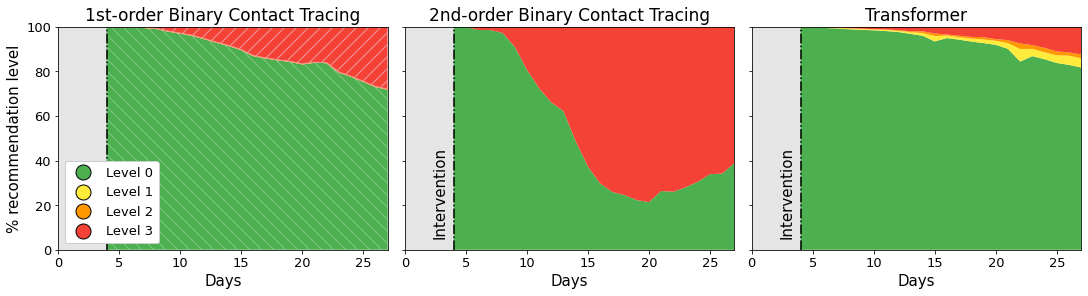

In [27]:
# Hardcoded
intervention_day = 5

fig = plt.figure(figsize=(15, 4), constrained_layout=True)
gridspec = fig.add_gridspec(1, 3)

legend_handles = [Line2D([0], [0], color='none', marker='o', markerfacecolor=color,
                  markeredgecolor='k', markersize=15, label=f'Level {level}')
                  for (level, color) in enumerate(colors)]

# 1st jellybean plot
ax0 = fig.add_subplot(gridspec[0, 0])
stacks0 = ax0.stackplot(intervention_day + np.arange(bdt1_rec_levels.shape[2]) - 1,
                       bdt1_rec_levels.mean(0),
                       colors=colors)
for stack, hatch, hatch_color in zip(stacks0, hatches, hatch_colors):
    stack.set_hatch(hatch)
    stack.set_edgecolor(hatch_color)

#ax0.plot(intervention_day + np.arange(bdt1_rec_levels.shape[2]) - 1, bdt1_rec_levels[:, 0].mean(0), c='k')
ax0.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
ax0.axvline(intervention_day - 1, c='k', ls='-.')
ax0.set_title('1st-order Binary Contact Tracing', size=17)
ax0.tick_params(axis='both', which='major', labelsize=13)
ax0.yaxis.set_ticklabels(['0', '20', '40', '60', '80', '100'])
ax0.set_ylabel('% recommendation level', size=15)
ax0.set_xlabel('Days', size=15)
ax0.margins(0, 0)
ax0.legend(handles=legend_handles, loc='lower left', framealpha=1.0, fontsize=13)

# 2nd jellybean plot
ax1 = fig.add_subplot(gridspec[0, 1])
ax1.stackplot(intervention_day + np.arange(bdt2_rec_levels.shape[2]) - 1,
              bdt2_rec_levels.mean(0),
              colors=colors)
#ax1.plot(intervention_day + np.arange(bdt2_rec_levels.shape[2]) - 1, bdt2_rec_levels[:, 0].mean(0), c='k')
ax1.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
ax1.axvline(intervention_day - 1, c='k', ls='-.')
ax1.set_title('2nd-order Binary Contact Tracing', size=17)
ax1.tick_params(axis='x', which='major', labelsize=13)
ax1.yaxis.set_ticklabels([])
ax1.set_xlabel('Days', size=15)
ax1.text(intervention_day - 1.5, 0.05, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax1.margins(0, 0)

# 3rd jellybean plot
ax2 = fig.add_subplot(gridspec[0, 2])
ax2.stackplot(intervention_day + np.arange(transformer_rec_levels.shape[2]) - 1,
              transformer_rec_levels.mean(0),
              colors=colors)
#ax2.plot(intervention_day + np.arange(transformer_rec_levels.shape[2]) - 1, transformer_rec_levels[:, 0].mean(0), c='k')
#ax2.plot(intervention_day + np.arange(transformer_rec_levels.shape[2]) - 1, transformer_rec_levels[:, :2].sum(1).mean(0), c='k')
#ax2.plot(intervention_day + np.arange(transformer_rec_levels.shape[2]) - 1, transformer_rec_levels[:, :3].sum(1).mean(0), c='k')
ax2.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
ax2.axvline(intervention_day - 1, c='k', ls='-.')
ax2.set_title('Transformer', size=17)
ax2.tick_params(axis='x', which='major', labelsize=13)
ax2.yaxis.set_ticklabels([])
ax2.set_xlabel('Days', size=15)
ax2.text(intervention_day - 1.5, 0.05, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax2.margins(0, 0)

# 4th jellybean plot
#ax3 = fig.add_subplot(gridspec[0, 3])
#ax3.stackplot(intervention_day + np.arange(oracle_rec_levels.shape[2]) - 1,
#              oracle_rec_levels.mean(0),
#              colors=colors)
#ax3.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
#ax3.axvline(intervention_day - 1, c='k', ls='-.')
#ax3.yaxis.set_ticklabels([])
#ax3.set_title('Oracle', size=17)
#ax3.tick_params(axis='x', which='major', labelsize=13)
#ax3.set_xlabel('Days', size=15)
#ax3.text(intervention_day - 1.5, 0.05, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
#ax3.margins(0, 0)


# Sample
#ax0.text(0.5 * (intervention_day + heuristic_rec_levels.shape[2] - 1), 0.5, 'PLACEHOLDER', size=32,
#         rotation=-15, ha='center', va='center', bbox=dict(boxstyle='square,pad=0.5', fc='w'))
#ax1.text(0.5 * (intervention_day + heuristic_rec_levels.shape[2] - 1), 0.5, 'PLACEHOLDER', size=32,
#         rotation=-15, ha='center', va='center', bbox=dict(boxstyle='square,pad=0.5', fc='w'))
#ax2.text(0.5 * (intervention_day + heuristic_rec_levels.shape[2] - 1), 0.5, 'PLACEHOLDER', size=32,
#         rotation=-15, ha='center', va='center', bbox=dict(boxstyle='square,pad=0.5', fc='w'))
#ax3.text(0.5 * (intervention_day + heuristic_rec_levels.shape[2] - 1), 0.5, 'PLACEHOLDER', size=32,
#         rotation=-15, ha='center', va='center', bbox=dict(boxstyle='square,pad=0.5', fc='w'))

#plt.savefig('figures/comparison-recommendation-levels.pdf', bbox_inches='tight', format='pdf')
plt.show()

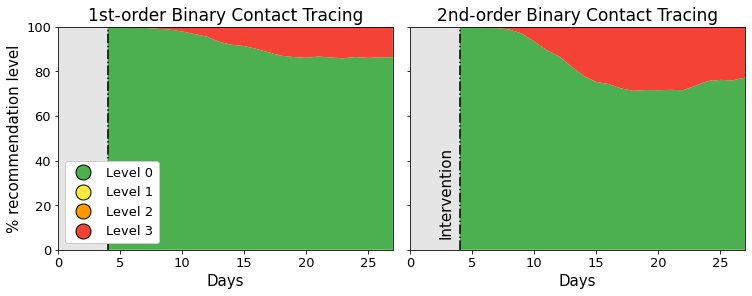

In [20]:
# Hardcoded
intervention_day = 5

fig = plt.figure(figsize=(20, 4), constrained_layout=True)
gridspec = fig.add_gridspec(1, 4)

legend_handles = [Line2D([0], [0], color='none', marker='o', markerfacecolor=color,
                  markeredgecolor='k', markersize=15, label=f'Level {level}')
                  for (level, color) in enumerate(colors)]

# 1st jellybean plot
ax0 = fig.add_subplot(gridspec[0, 0])
ax0.stackplot(intervention_day + np.arange(bdt1_rec_levels[(0.8415, 0.6)].shape[2]) - 1,
              bdt1_rec_levels[(0.4215, 0.6)].mean(0),
              colors=colors)
ax0.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
ax0.axvline(intervention_day - 1, c='k', ls='-.')
ax0.set_title('1st-order Binary Contact Tracing', size=17)
ax0.tick_params(axis='both', which='major', labelsize=13)
ax0.yaxis.set_ticklabels(['0', '20', '40', '60', '80', '100'])
ax0.set_ylabel('% recommendation level', size=15)
ax0.set_xlabel('Days', size=15)
ax0.margins(0, 0)
ax0.legend(handles=legend_handles, loc='lower left', framealpha=1.0, fontsize=13)

# 2nd jellybean plot
ax1 = fig.add_subplot(gridspec[0, 1])
ax1.stackplot(intervention_day + np.arange(bdt2_rec_levels[(0.8415, 0.6)].shape[2]) - 1,
              bdt2_rec_levels[(0.4215, 0.6)].mean(0),
              colors=colors)
ax1.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
ax1.axvline(intervention_day - 1, c='k', ls='-.')
ax1.set_title('2nd-order Binary Contact Tracing', size=17)
ax1.tick_params(axis='x', which='major', labelsize=13)
ax1.yaxis.set_ticklabels([])
ax1.set_xlabel('Days', size=15)
ax1.text(intervention_day - 1.5, 0.05, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
ax1.margins(0, 0)

# 3rd jellybean plot
#ax2 = fig.add_subplot(gridspec[0, 2])
#ax2.stackplot(intervention_day + np.arange(heuristic_rec_levels.shape[2]) - 1,
#              heuristic_rec_levels.mean(0),
#              colors=colors)
#ax2.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
#ax2.axvline(intervention_day - 1, c='k', ls='-.')
#ax2.set_title('Transformer', size=17)
#ax2.tick_params(axis='x', which='major', labelsize=13)
#ax2.yaxis.set_ticklabels([])
#ax2.set_xlabel('Days', size=15)
#ax2.text(intervention_day - 1.5, 0.05, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
#ax2.margins(0, 0)

# 4th jellybean plot
#ax3 = fig.add_subplot(gridspec[0, 3])
#ax3.stackplot(intervention_day + np.arange(heuristic_rec_levels.shape[2]) - 1,
#              heuristic_rec_levels.mean(0),
#              colors=colors)
#ax3.axvspan(0, intervention_day - 1, fc='gray', alpha=0.2)
#ax3.axvline(intervention_day - 1, c='k', ls='-.')
#ax3.yaxis.set_ticklabels([])
#ax3.set_title('Transformer with oracle', size=17)
#ax3.tick_params(axis='x', which='major', labelsize=13)
#ax3.set_xlabel('Days', size=15)
#ax3.text(intervention_day - 1.5, 0.05, 'Intervention', size=15, ha='right', va='bottom', rotation=90)
#ax3.margins(0, 0)


# Sample
#ax0.text(0.5 * (intervention_day + heuristic_rec_levels.shape[2] - 1), 0.5, 'PLACEHOLDER', size=32,
#         rotation=-15, ha='center', va='center', bbox=dict(boxstyle='square,pad=0.5', fc='w'))
#ax1.text(0.5 * (intervention_day + heuristic_rec_levels.shape[2] - 1), 0.5, 'PLACEHOLDER', size=32,
#         rotation=-15, ha='center', va='center', bbox=dict(boxstyle='square,pad=0.5', fc='w'))
#ax2.text(0.5 * (intervention_day + heuristic_rec_levels.shape[2] - 1), 0.5, 'PLACEHOLDER', size=32,
#         rotation=-15, ha='center', va='center', bbox=dict(boxstyle='square,pad=0.5', fc='w'))
#ax3.text(0.5 * (intervention_day + heuristic_rec_levels.shape[2] - 1), 0.5, 'PLACEHOLDER', size=32,
#         rotation=-15, ha='center', va='center', bbox=dict(boxstyle='square,pad=0.5', fc='w'))

#plt.savefig('figures/comparison-recommendation-levels.pdf', bbox_inches='tight', format='pdf')
plt.show()